In [3]:
from pygmo import *
import pygmo as pg
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
population_size = 50
fitness_results = []
rastrigin_data = pd.read_csv("Data/rastrigin_data.csv")
rastrigin = rastrigin_data["val"].tolist()

In [6]:
class shifted_rastrigin:
    def __init__(self, dims):
        self.dims = dims
    def fitness(self, x):
        bias = -330.0
        z = np.array(x) - np.array(rastrigin[:self.dims])
        F = np.sum(np.square(z) - (10*np.cos(2*np.pi*z)) + 10)
        global fitness_results
        val = F + bias
        fitness_results.append(val)
        return [val, ]
   
    def get_bounds(self):
        return ([-5]*self.dims,[5]*self.dims)

In [7]:
def execute_algorithm(dims):
    global fitness_results
    fitness_results = []
    current_algorithm = None
    current_problem = None
    current_population = None
    if(dims == 50):
        current_algorithm = algorithm(sade(gen=2500, variant_adptv=1, ftol=1e-09, xtol=1e-09))
        current_problem = pg.problem(shifted_rastrigin(50))
        current_population = population(current_problem, 25)
    elif(dims == 500):
        current_algorithm = algorithm(sade(gen=30000,variant_adptv=1, ftol=1e-09, xtol=1e-09))
        current_problem = pg.problem(shifted_rastrigin(500))
        current_population = population(current_problem, 50)
    else : 
        return "Provide correct dimensions"
        
    start_time = time.time()
    current_population_result = current_algorithm.evolve(current_population)
    ended_time = time.time()
    completed_time = ended_time - start_time
    print(current_population_result)
    print("\nComputational time:", round(completed_time, 2), "seconds\n")


Problem name: <class '__main__.shifted_rastrigin'>
	C++ class name: class pybind11::object

	Global dimension:			50
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5, -5, -5, -5, ... ]
	Upper bounds: [5, 5, 5, 5, 5, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 54400

	Thread safety: none

Population size: 25

List of individuals: 
#0:
	ID:			10210886025595128096
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646538, 4.3382, ... ]
	Fitness vector:		[-330]
#1:
	ID:			13074890394063239169
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646537, 4.3382, ... ]
	Fitness vector:		[-330]
#2:
	ID:			10710301346682758606
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646539, 4.3382, ... ]
	Fitness vector:		[-330]
#3:
	ID:			1

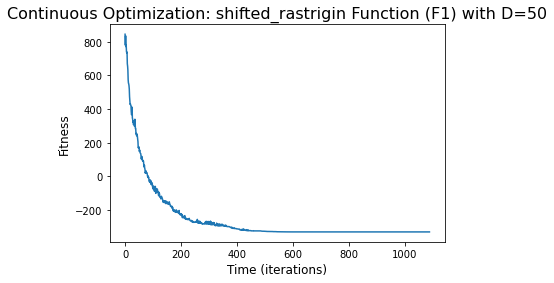

In [8]:
execute_algorithm(50)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted_rastrigin Function (F1) with D=50", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()


Problem name: <class '__main__.shifted_rastrigin'>
	C++ class name: class pybind11::object

	Global dimension:			500
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5, -5, -5, -5, ... ]
	Upper bounds: [5, 5, 5, 5, 5, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 1080500

	Thread safety: none

Population size: 50

List of individuals: 
#0:
	ID:			16783271686189079383
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646538, 4.3382, ... ]
	Fitness vector:		[-330]
#1:
	ID:			2979425261934532723
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646538, 4.3382, ... ]
	Fitness vector:		[-330]
#2:
	ID:			6534734624874177409
	Decision vector:	[3.84659, 4.32362, -2.82163, 0.646538, 4.3382, ... ]
	Fitness vector:		[-330]
#3:
	ID:			

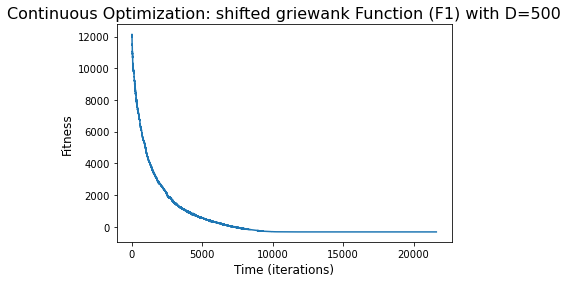

In [13]:
execute_algorithm(500)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted_rastrigin Function (F1) with D=500", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()